# Credit scoring models

We will train our credit scoring models based on the HELOC dataset which was published by FICO for their [Explainable ML Challenge](https://community.fico.com/s/explainable-machine-learning-challenge).

## Load data

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!ln -s ../data

ln: ./data: File exists


In [3]:
DATA_PATH = "data/heloc/heloc_dataset_v1.csv"

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [5]:
raw = pd.read_csv(DATA_PATH)
raw.shape

(10459, 24)

In [6]:
raw.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80


In [7]:
raw.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

## Preprocess labels

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

In [9]:
# custom Transformer that recodes string variables
class StringEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, classes):
        self.classes_ = classes
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.replace(to_replace=self.classes_)

In [10]:
enc = StringEncoder({'Good': 0, 'Bad': 1})
enc.fit(raw.RiskPerformance)
enc.classes_

{'Good': 0, 'Bad': 1}

In [11]:
raw.RiskPerformance = enc.transform(raw.RiskPerformance)
raw.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,1,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69
1,1,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0
2,1,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86
3,1,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91
4,1,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80


## Naive benchmark: logistic regression

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = raw.RiskPerformance
X = raw.drop(columns='RiskPerformance')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
print(X_train.shape)
print(X_test.shape)

(8367, 23)
(2092, 23)


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log_reg = LogisticRegression().fit(X_train, y_train)
log_reg.score(X_train, y_train)

/Users/felix/miniconda3/envs/ethical_ai/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7002509860164934

In [17]:
log_reg.score(X_test, y_test)

0.7136711281070746

## Basic feature engineering

### Handling missing values

The following codes are used for missing values:
- `-9`: No Bureau Record or No Investigation
- `-8`: No Usable/Valid Trades or Inquiries
- `-7`: Condition not Met (e.g. No Inquiries, No Delinquencies)

In [18]:
import numpy as np

def missing_freq_by_col(data, missing_codes):
    res_list = []
    for col in data.columns:
        counts = data[col].value_counts(normalize=True)
        res = []
        for code in missing_codes:
            if code in counts.index:
                res.append(counts.loc[code])
            else:
                res.append(0.0)
        res_list.append(res)
    return pd.DataFrame(data=np.array(res_list), index=data.columns, columns=missing_codes)

In [19]:
missing_freq_by_col(X, [-9, -8, -7])

,-9,-8,-7
ExternalRiskEstimate,0.057176,0.000000,0.000000
MSinceOldestTradeOpen,0.056220,0.022851,0.000000
MSinceMostRecentTradeOpen,0.056220,0.000000,0.000000
AverageMInFile,0.056220,0.000000,0.000000
NumSatisfactoryTrades,0.056220,0.000000,0.000000
NumTrades60Ever2DerogPubRec,0.056220,0.000000,0.000000
NumTrades90Ever2DerogPubRec,0.056220,0.000000,0.000000
PercentTradesNeverDelq,0.056220,0.000000,0.000000
MSinceMostRecentDelq,0.056220,0.016828,0.445932
MaxDelq2PublicRecLast12M,0.056220,0.000000,0.000000


In [20]:
from sklearn.impute import MissingIndicator

In [21]:
ind_nm = MissingIndicator(missing_values=-7)
ind_nm.fit(X)
df_nm = pd.DataFrame(data=ind_nm.transform(X), columns=[c+'_not_met' for c in X.columns[ind_nm.features_]])
df_nm.shape

(10459, 2)

In [22]:
ind_inv = MissingIndicator(missing_values=-8)
ind_inv.fit(X)
df_inv = pd.DataFrame(data=ind_inv.transform(X), columns=[c+'_invalid' for c in X.columns[ind_inv.features_]])
df_inv.shape

(10459, 9)

In [23]:
ind_nr = MissingIndicator(missing_values=-9)
ind_nr.fit(X)
df_nr = pd.DataFrame(data=ind_nr.transform(X), columns=[c+'_no_record' for c in X.columns[ind_nr.features_]])
df_nr.shape

(10459, 23)

In [24]:
X = pd.concat([X, df_nm, df_inv, df_nr], axis=1)
X.shape

(10459, 57)

In [25]:
X.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,MSinceMostRecentDelq_not_met,MSinceMostRecentInqexcl7days_not_met,MSinceOldestTradeOpen_invalid,MSinceMostRecentDelq_invalid,MSinceMostRecentInqexcl7days_invalid,NetFractionRevolvingBurden_invalid,NetFractionInstallBurden_invalid,NumRevolvingTradesWBalance_invalid,NumInstallTradesWBalance_invalid,NumBank2NatlTradesWHighUtilization_invalid,PercentTradesWBalance_invalid,ExternalRiskEstimate_no_record,MSinceOldestTradeOpen_no_record,MSinceMostRecentTradeOpen_no_record,AverageMInFile_no_record,NumSatisfactoryTrades_no_record,NumTrades60Ever2DerogPubRec_no_record,NumTrades90Ever2DerogPubRec_no_record,PercentTradesNeverDelq_no_record,MSinceMostRecentDelq_no_record,MaxDelq2PublicRecLast12M_no_record,MaxDelqEver_no_record,NumTotalTrades_no_record,NumTradesOpeninLast12M_no_record,PercentInstallTrades_no_record,MSinceMostRecentInqexcl7days_no_record,NumInqLast6M_no_record,NumInqLast6Mexcl7days_no_record,NetFractionRevolvingBurden_no_record,NetFractionInstallBurden_no_record,NumRevolvingTradesWBalance_no_record,NumInstallTradesWBalance_no_record,NumBank2NatlTradesWHighUtilization_no_record,PercentTradesWBalance_no_record
0,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# custom Transformer that marks missing values with different codes
class MissingValueEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, codes):
        self.codes_ = codes
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.replace(to_replace=self.codes_, value=np.nan)

In [27]:
mv_enc = MissingValueEncoder([-9, -8, -7])
mv_enc.fit(X)
X = mv_enc.transform(X)
X.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,MSinceMostRecentDelq_not_met,MSinceMostRecentInqexcl7days_not_met,MSinceOldestTradeOpen_invalid,MSinceMostRecentDelq_invalid,MSinceMostRecentInqexcl7days_invalid,NetFractionRevolvingBurden_invalid,NetFractionInstallBurden_invalid,NumRevolvingTradesWBalance_invalid,NumInstallTradesWBalance_invalid,NumBank2NatlTradesWHighUtilization_invalid,PercentTradesWBalance_invalid,ExternalRiskEstimate_no_record,MSinceOldestTradeOpen_no_record,MSinceMostRecentTradeOpen_no_record,AverageMInFile_no_record,NumSatisfactoryTrades_no_record,NumTrades60Ever2DerogPubRec_no_record,NumTrades90Ever2DerogPubRec_no_record,PercentTradesNeverDelq_no_record,MSinceMostRecentDelq_no_record,MaxDelq2PublicRecLast12M_no_record,MaxDelqEver_no_record,NumTotalTrades_no_record,NumTradesOpeninLast12M_no_record,PercentInstallTrades_no_record,MSinceMostRecentInqexcl7days_no_record,NumInqLast6M_no_record,NumInqLast6Mexcl7days_no_record,NetFractionRevolvingBurden_no_record,NetFractionInstallBurden_no_record,NumRevolvingTradesWBalance_no_record,NumInstallTradesWBalance_no_record,NumBank2NatlTradesWHighUtilization_no_record,PercentTradesWBalance_no_record
0,55.0,144.0,4.0,84.0,20.0,3.0,0.0,83.0,2.0,3.0,5.0,23.0,1.0,43.0,0.0,0.0,0.0,33.0,NaN,8.0,1.0,1.0,69.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,NaN,0.0,8.0,7.0,0.0,67.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,67.0,66.0,5.0,24.0,9.0,0.0,0.0,100.0,NaN,7.0,8.0,9.0,4.0,44.0,0.0,4.0,4.0,53.0,66.0,4.0,2.0,1.0,86.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,66.0,169.0,1.0,73.0,28.0,1.0,1.0,93.0,76.0,6.0,6.0,30.0,3.0,57.0,0.0,5.0,4.0,72.0,83.0,6.0,4.0,3.0,91.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,81.0,333.0,27.0,132.0,12.0,0.0,0.0,100.0,NaN,7.0,8.0,12.0,0.0,25.0,0.0,1.0,1.0,51.0,89.0,3.0,1.0,0.0,80.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imp = SimpleImputer(strategy='median')
imp.fit(X)
cols = X.columns
X = pd.DataFrame(data=imp.transform(X), columns=cols)
X.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,MSinceMostRecentDelq_not_met,MSinceMostRecentInqexcl7days_not_met,MSinceOldestTradeOpen_invalid,MSinceMostRecentDelq_invalid,MSinceMostRecentInqexcl7days_invalid,NetFractionRevolvingBurden_invalid,NetFractionInstallBurden_invalid,NumRevolvingTradesWBalance_invalid,NumInstallTradesWBalance_invalid,NumBank2NatlTradesWHighUtilization_invalid,PercentTradesWBalance_invalid,ExternalRiskEstimate_no_record,MSinceOldestTradeOpen_no_record,MSinceMostRecentTradeOpen_no_record,AverageMInFile_no_record,NumSatisfactoryTrades_no_record,NumTrades60Ever2DerogPubRec_no_record,NumTrades90Ever2DerogPubRec_no_record,PercentTradesNeverDelq_no_record,MSinceMostRecentDelq_no_record,MaxDelq2PublicRecLast12M_no_record,MaxDelqEver_no_record,NumTotalTrades_no_record,NumTradesOpeninLast12M_no_record,PercentInstallTrades_no_record,MSinceMostRecentInqexcl7days_no_record,NumInqLast6M_no_record,NumInqLast6Mexcl7days_no_record,NetFractionRevolvingBurden_no_record,NetFractionInstallBurden_no_record,NumRevolvingTradesWBalance_no_record,NumInstallTradesWBalance_no_record,NumBank2NatlTradesWHighUtilization_no_record,PercentTradesWBalance_no_record
0,55.0,144.0,4.0,84.0,20.0,3.0,0.0,83.0,2.0,3.0,5.0,23.0,1.0,43.0,0.0,0.0,0.0,33.0,74.0,8.0,1.0,1.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,15.0,0.0,8.0,7.0,0.0,67.0,0.0,0.0,0.0,0.0,74.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67.0,66.0,5.0,24.0,9.0,0.0,0.0,100.0,15.0,7.0,8.0,9.0,4.0,44.0,0.0,4.0,4.0,53.0,66.0,4.0,2.0,1.0,86.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,66.0,169.0,1.0,73.0,28.0,1.0,1.0,93.0,76.0,6.0,6.0,30.0,3.0,57.0,0.0,5.0,4.0,72.0,83.0,6.0,4.0,3.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,81.0,333.0,27.0,132.0,12.0,0.0,0.0,100.0,15.0,7.0,8.0,12.0,0.0,25.0,0.0,1.0,1.0,51.0,89.0,3.0,1.0,0.0,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature distributions

In [30]:
import matplotlib.pyplot as plt

#### Numerical variables

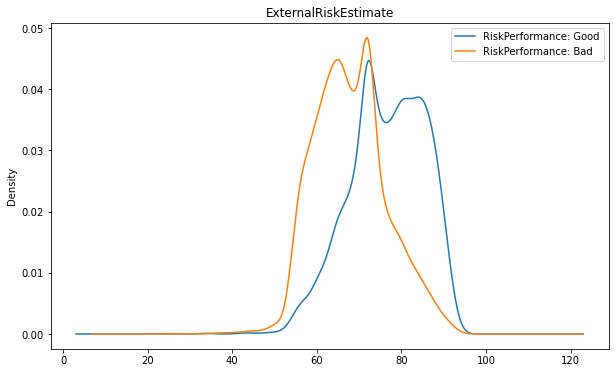

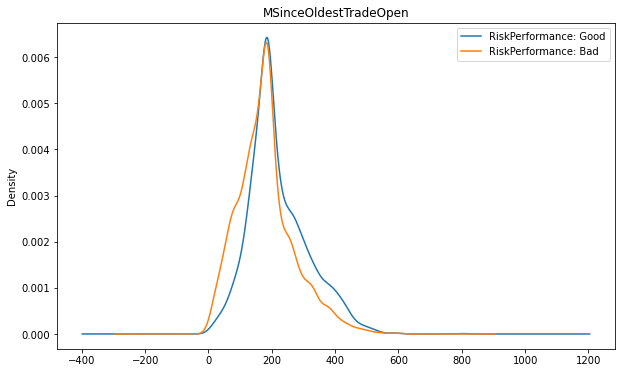

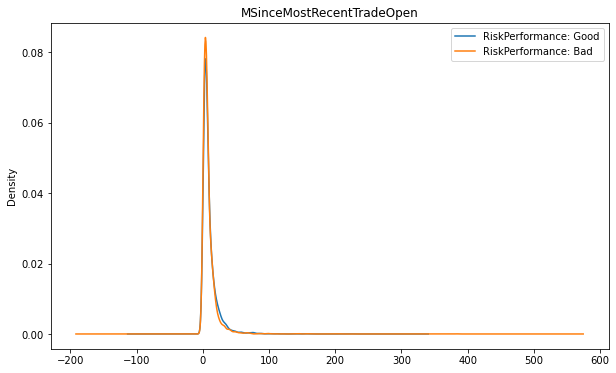

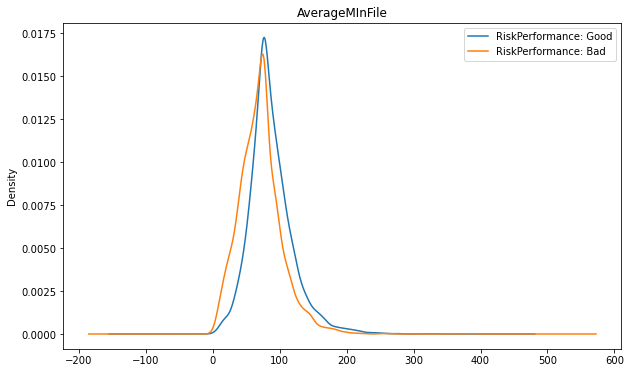

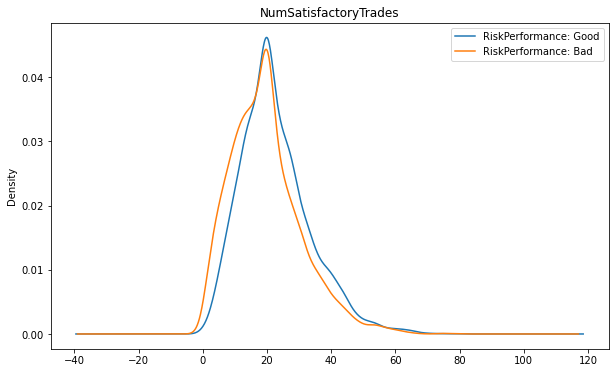

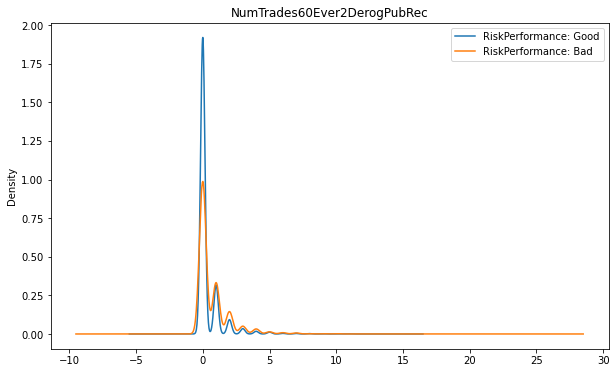

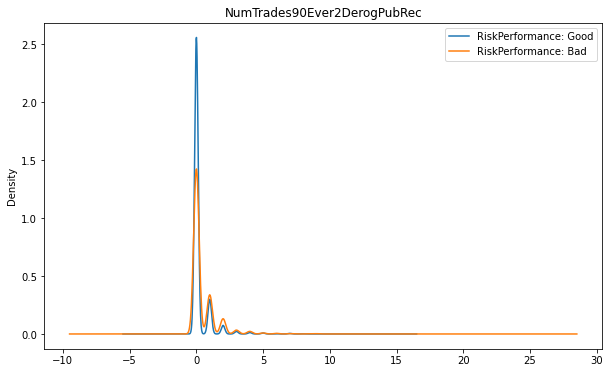

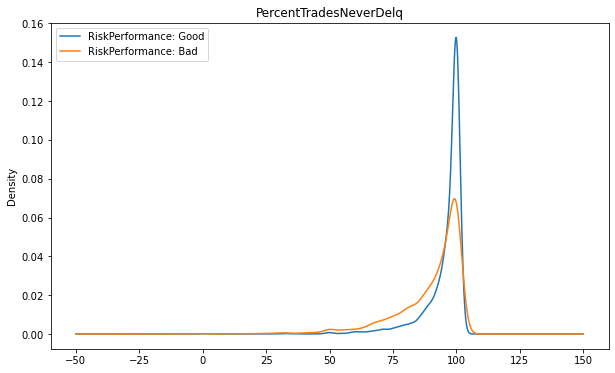

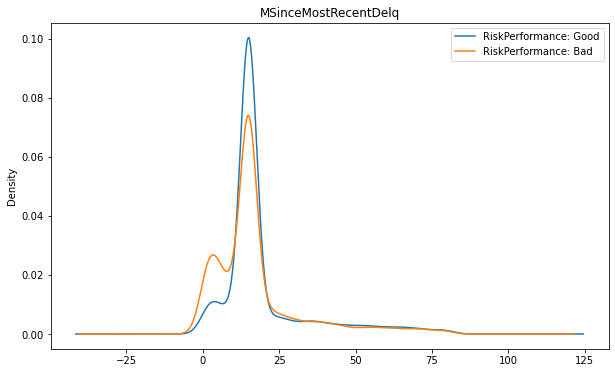

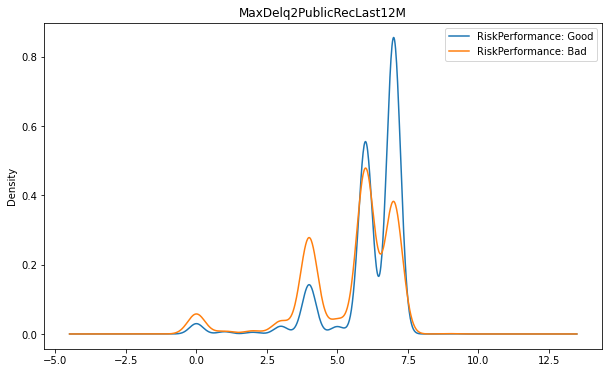

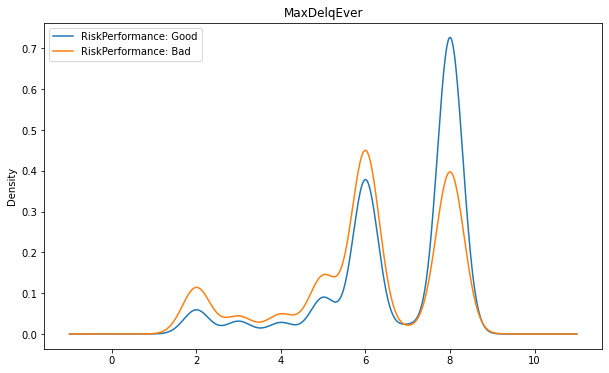

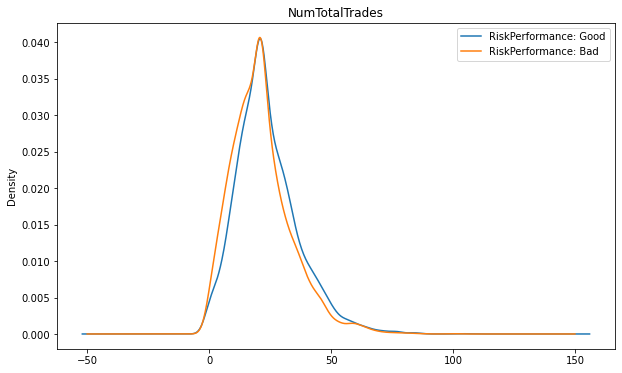

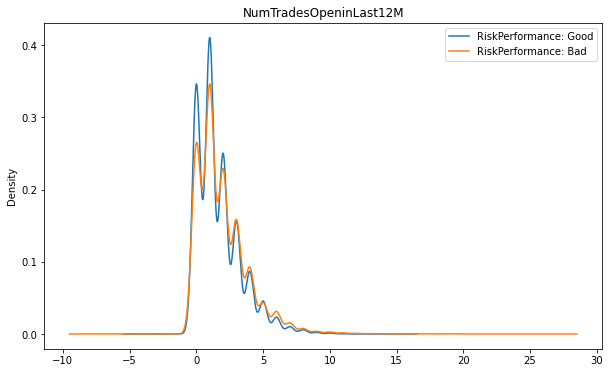

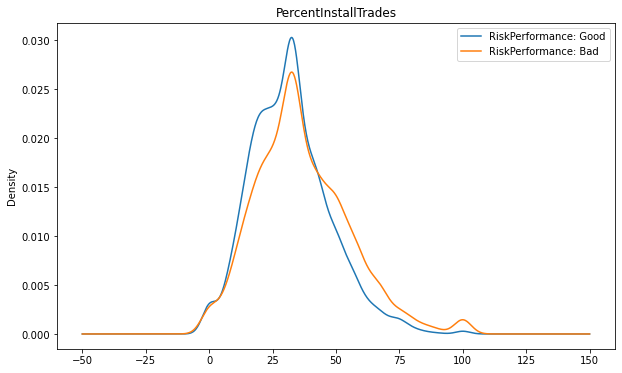

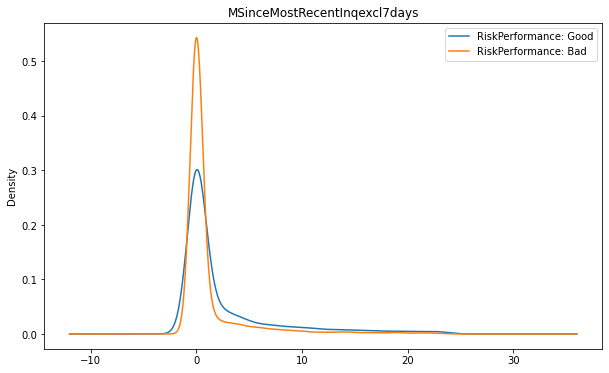

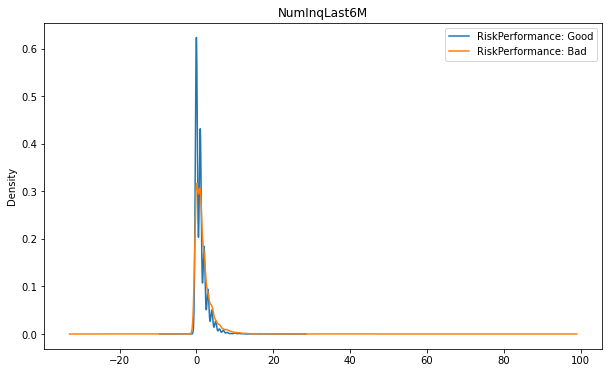

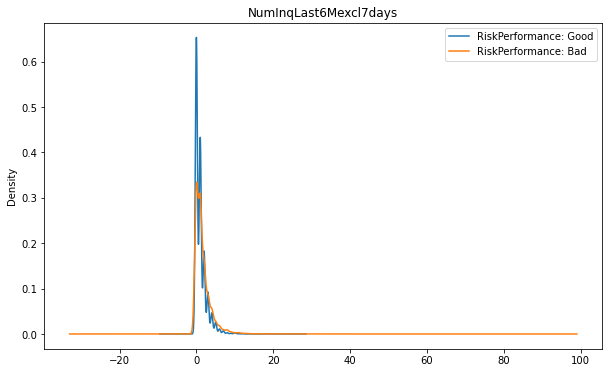

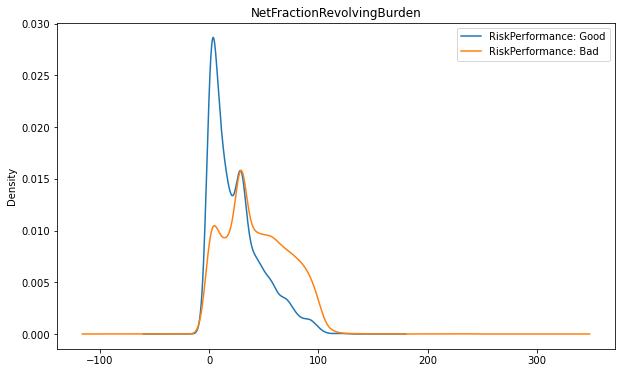

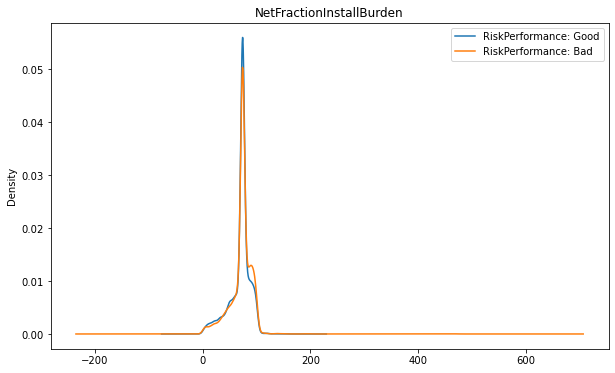

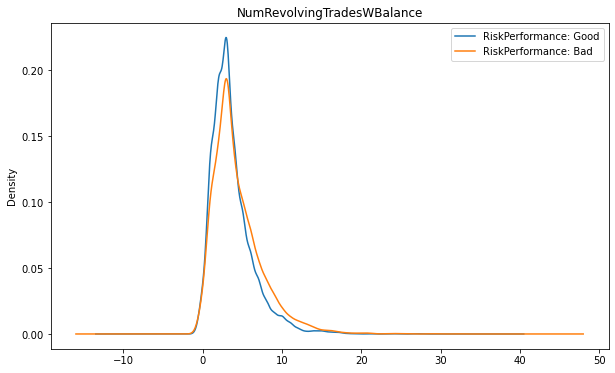

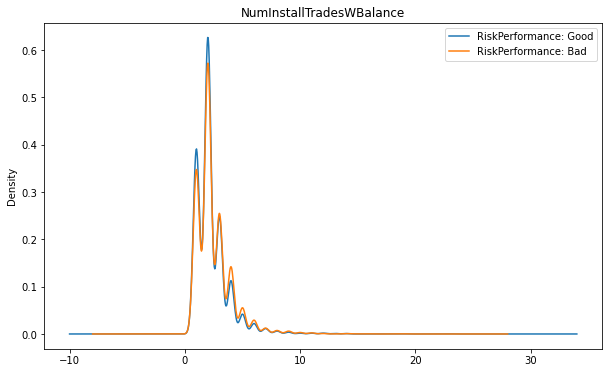

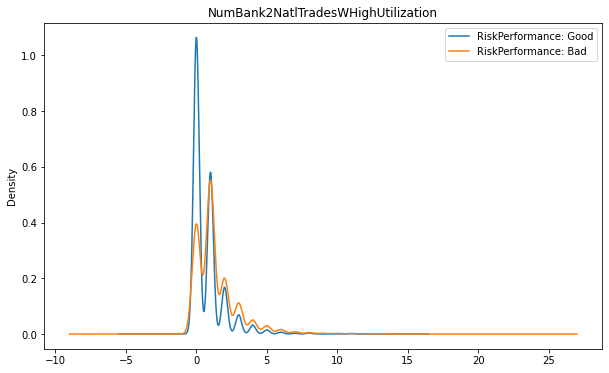

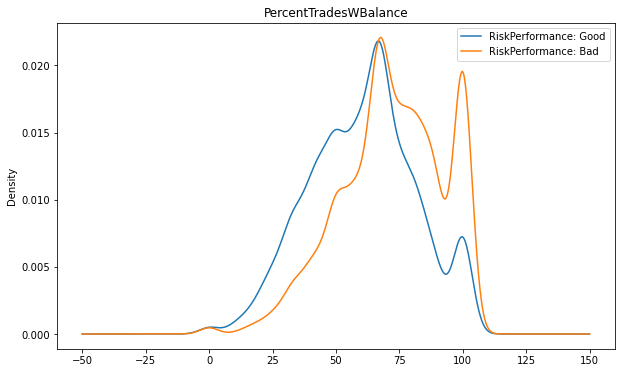

In [51]:
proc = pd.concat([y, X], axis=1)
for col in X.columns[:(raw.shape[1]-1)]:
    ax = proc.groupby(['RiskPerformance'])[col].plot.density(title=col, figsize=(10,6))
    plt.legend(['RiskPerformance: Good', 'RiskPerformance: Bad'])
    plt.show()

#### Dummy variables

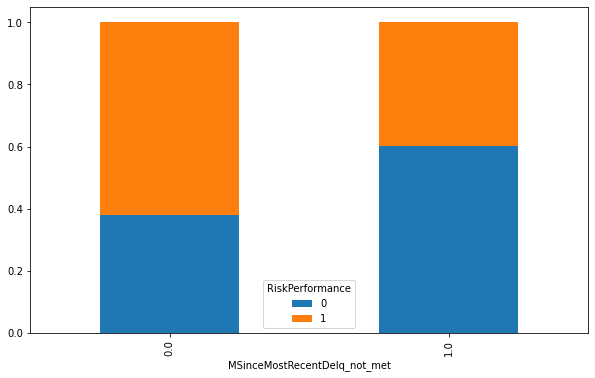

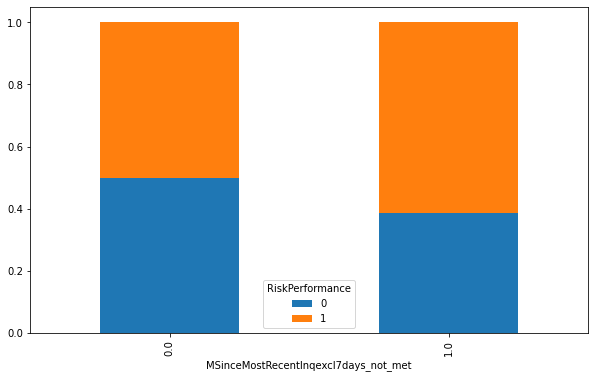

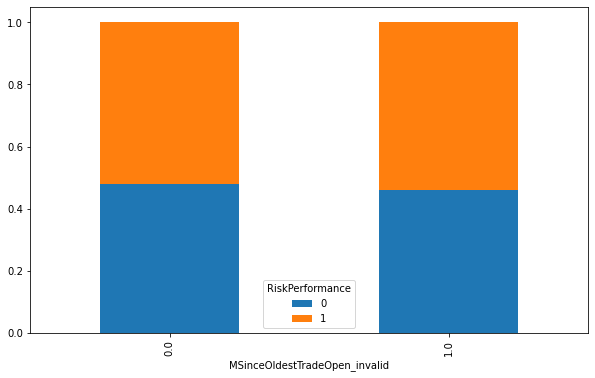

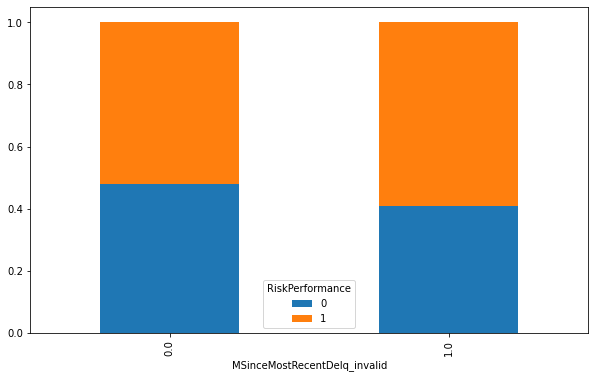

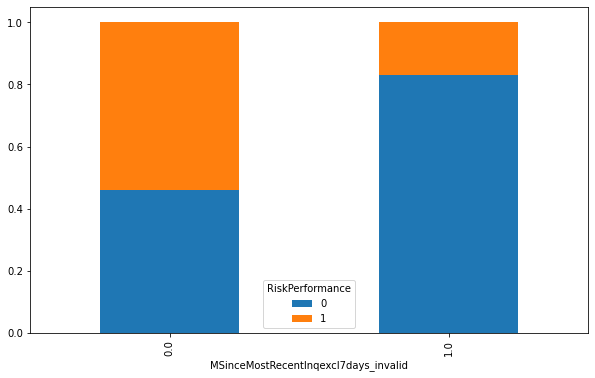

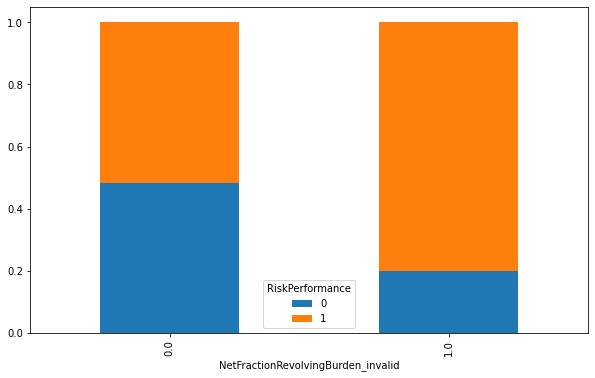

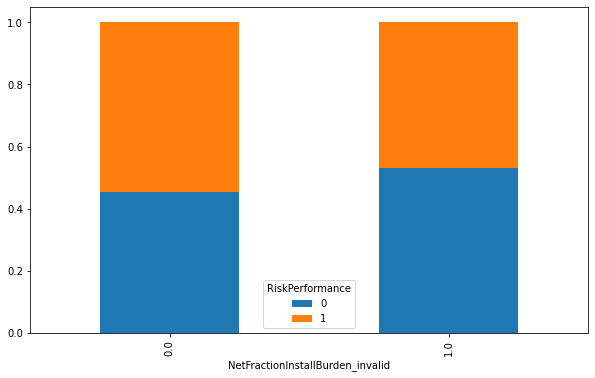

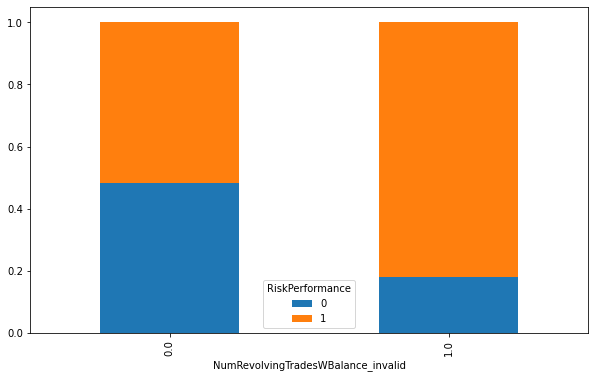

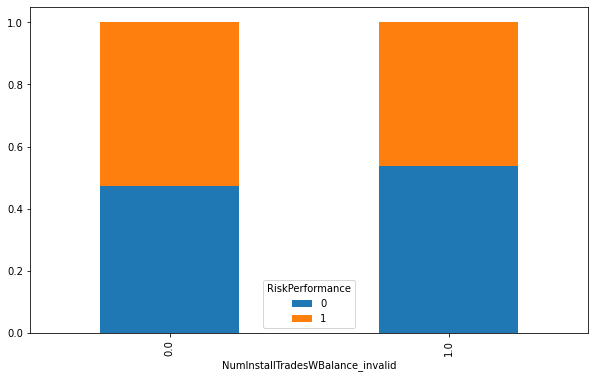

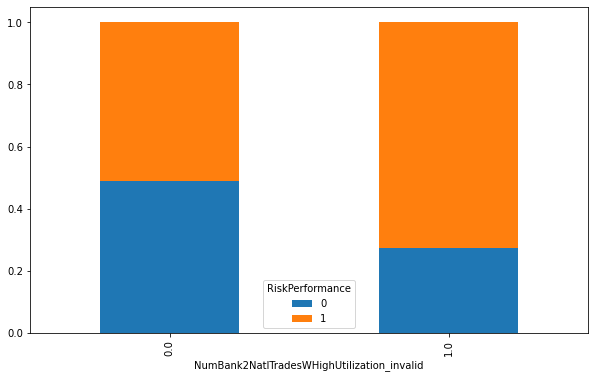

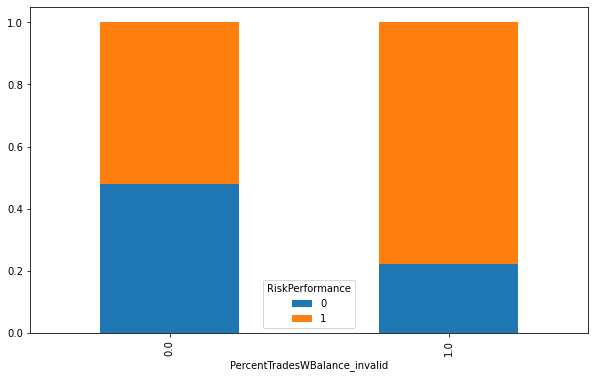

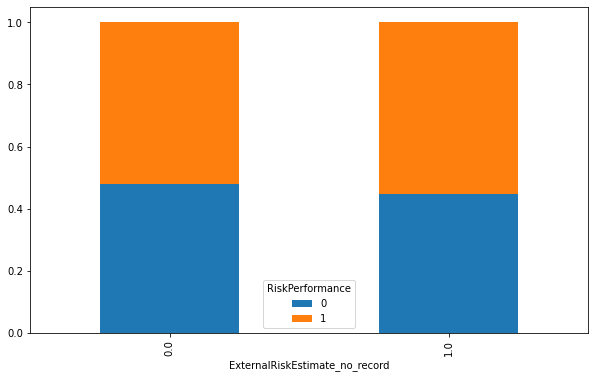

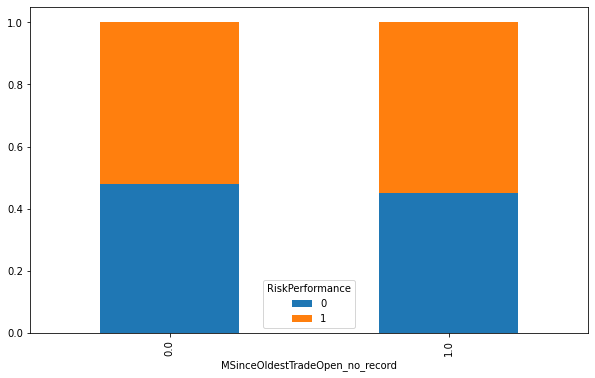

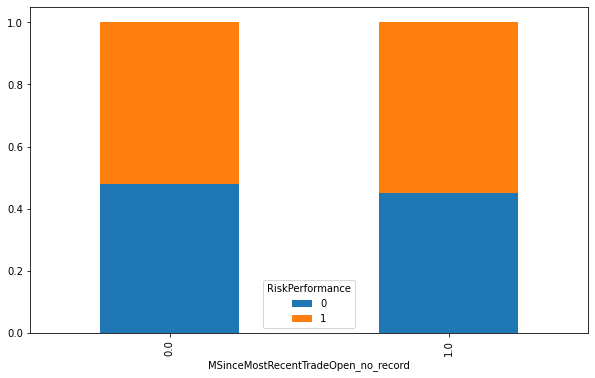

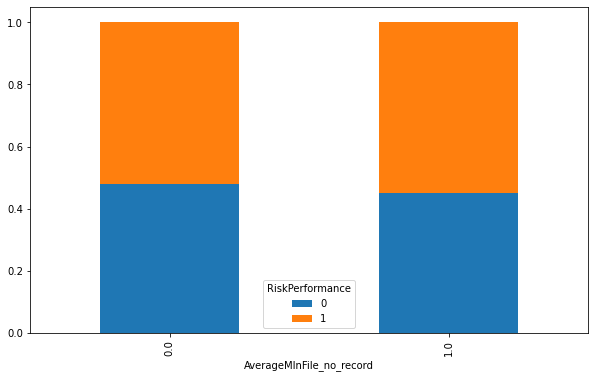

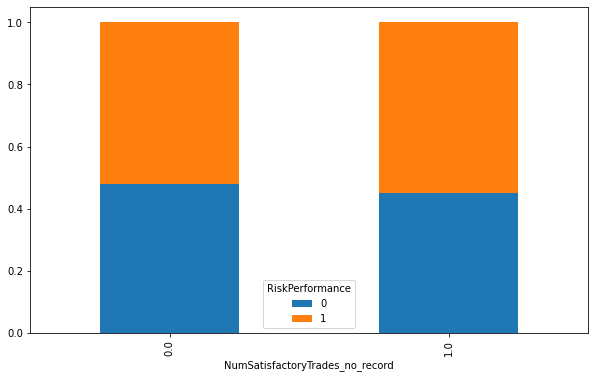

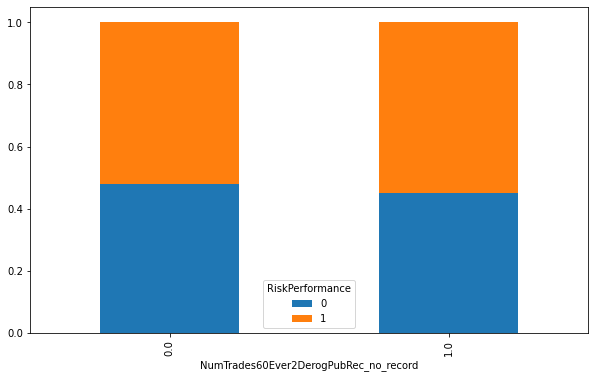

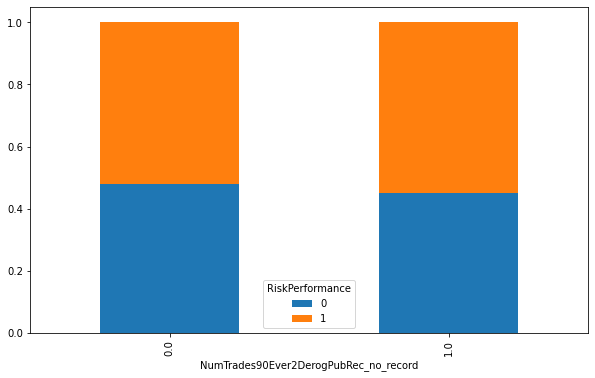

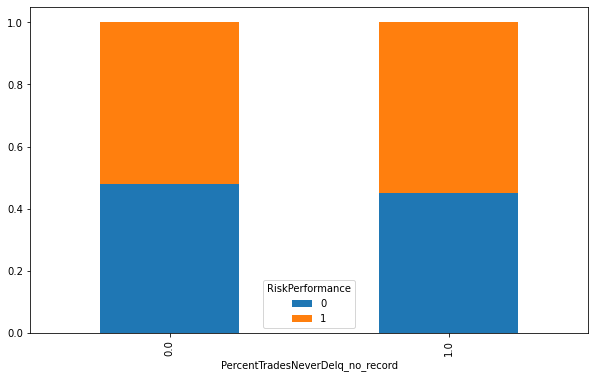

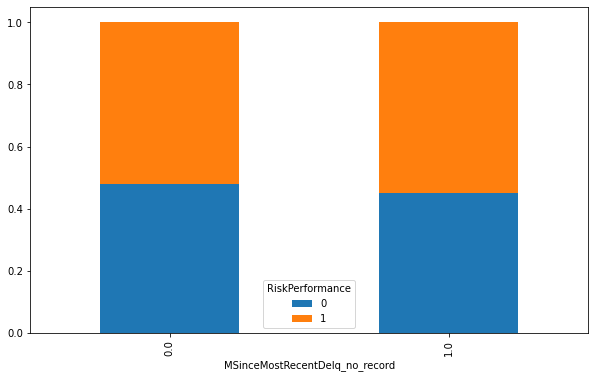

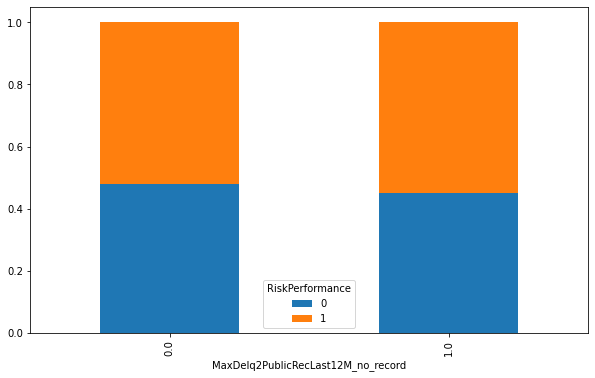

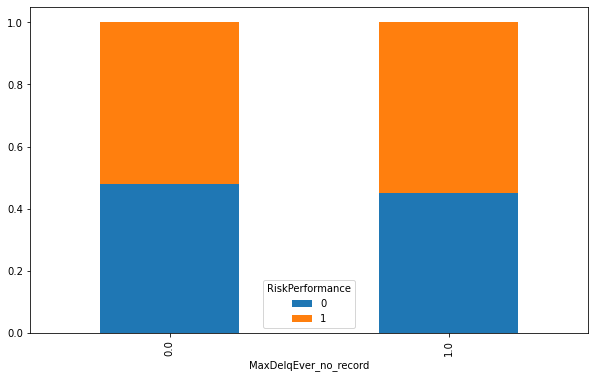

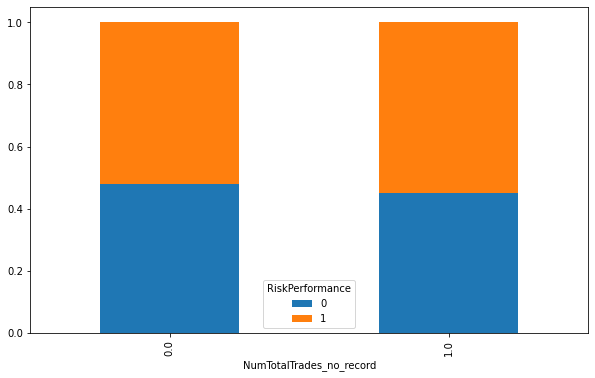

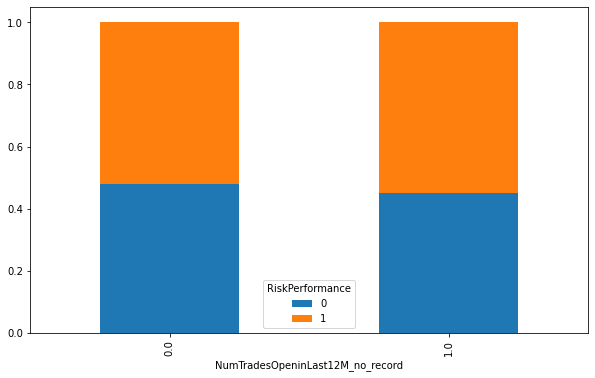

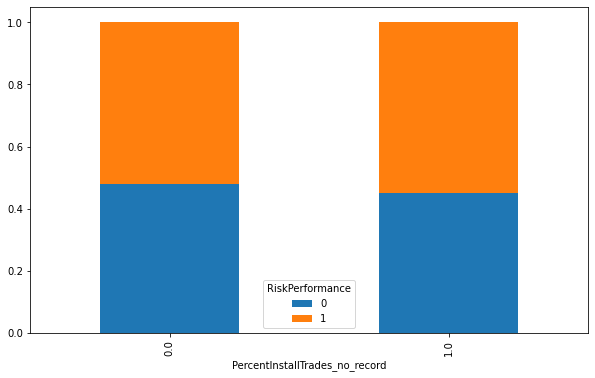

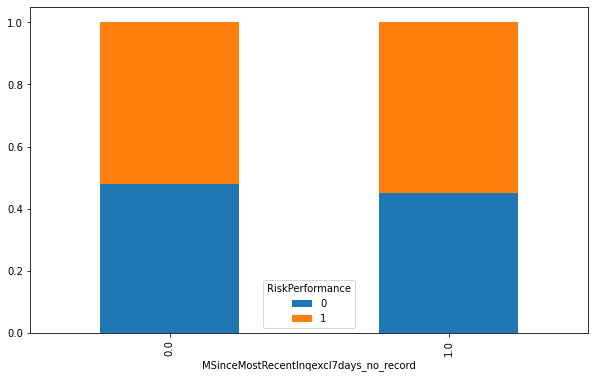

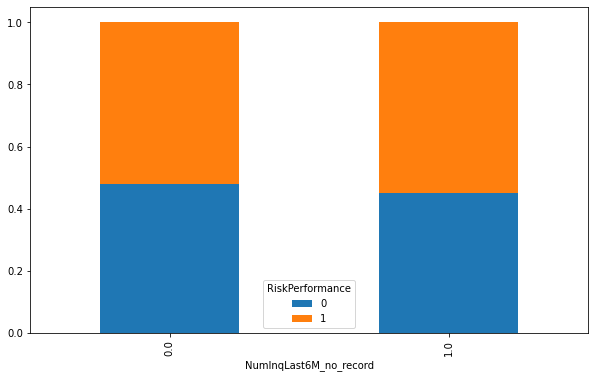

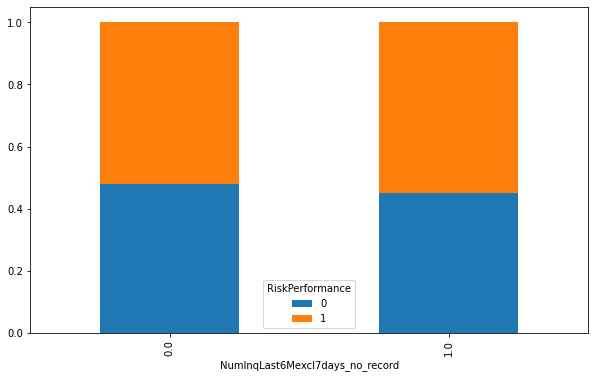

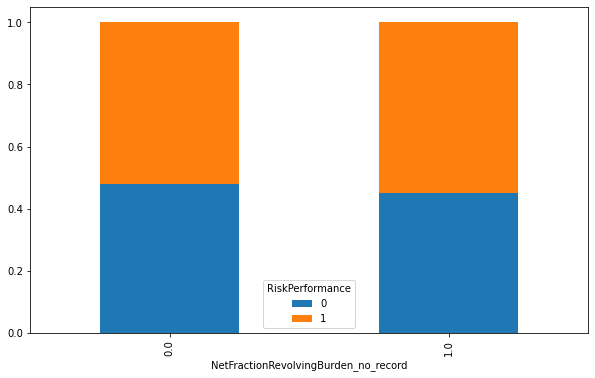

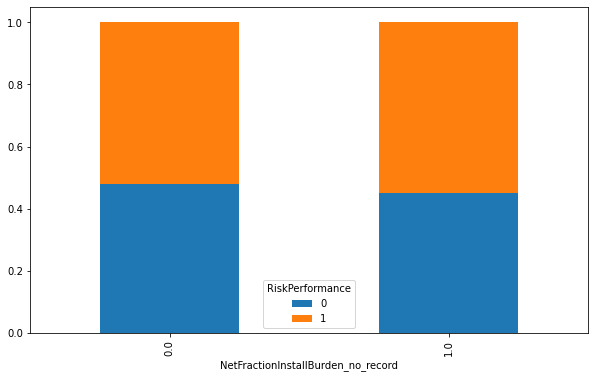

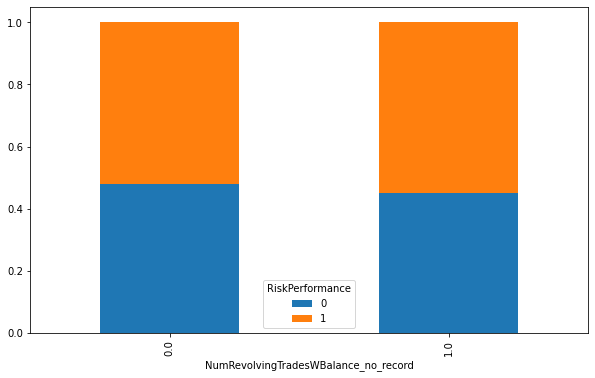

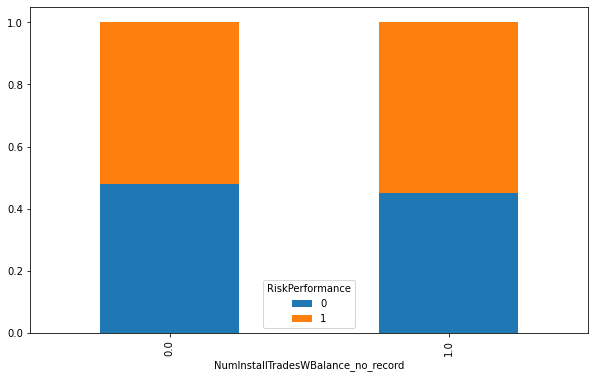

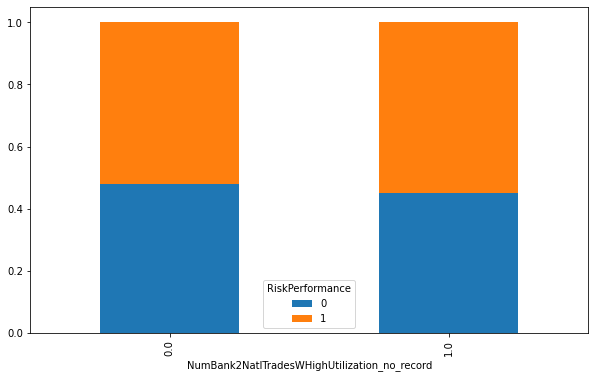

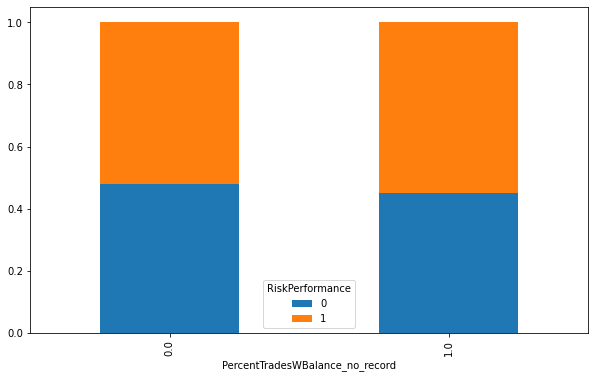

In [86]:
for col in X.columns[(raw.shape[1]-1):]:
    df = proc.groupby([col, 'RiskPerformance']).size().unstack()
    df['total'] = df.sum(axis=1)
    df = df.div(df.total, axis=0).drop(columns=['total'])
    df.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.show()